# Spotify Podcast Dataset - Word Diversity on Multiple Episodes


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('../../../podcasts-no-audio-13GB-selected/metadata.tsv', sep='\t')

In [3]:
df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix',
       'first_dir', 'second_dir', 'category', 'mean_show_duration', 'top_5',
       'bottom_5', 'transcript', 'stem_transcript', 'word_diversity',
       'unique_words'],
      dtype='object')

In [6]:

print(f"{(~df['stem_transcript'].isna()).sum()} Episodes with transcripts.")

4328 Episodes with transcripts.


In [7]:
df2 = df[~df['stem_transcript'].isna()]
df2.shape

(4328, 22)

## Pre-calculated Values

<Axes: ylabel='Frequency'>

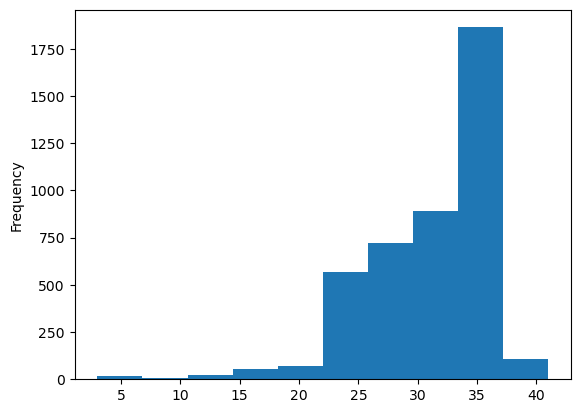

In [8]:
df2['unique_words'].plot.hist()

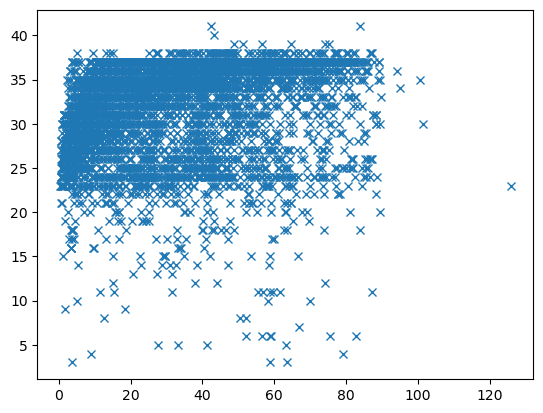

In [13]:
plt.plot(df2['duration'],df2['unique_words'],'x')


## Raw Values

In [42]:
word_set = set(df2['stem_transcript'].sample(1).iloc[0].split())
len(word_set)

1294

In [56]:
def unique_word_count(row):
    #len(set(row.stem_transcript.split()))
    return len(set(row['stem_transcript'].split()))

df2['unique_words_2'] = df2.apply(unique_word_count,axis=1)

<Axes: ylabel='Frequency'>

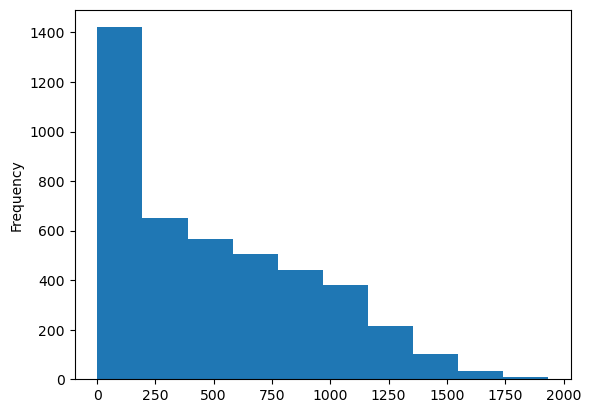

In [61]:
df2.unique_words_2.plot.hist()

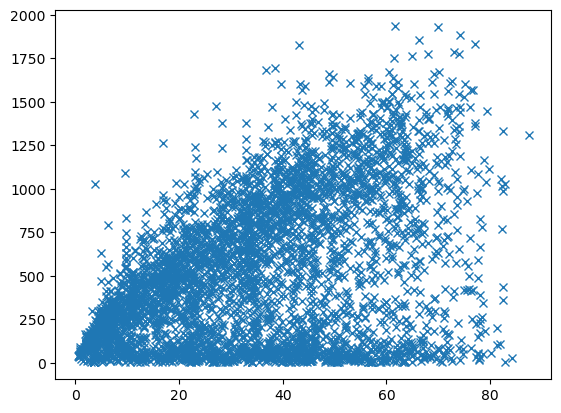

In [63]:
plt.plot(df2.mean_show_duration, df2.unique_words_2,'x')

## Error in Transcript parsing...

In [65]:
df2[['duration','unique_words_2']].describe()

,duration,unique_words_2
count,4328.000000,4328.000000
mean,33.610207,504.703558
std,22.319906,418.034646
min,0.329717,1.000000
25%,13.758488,117.000000
50%,31.607717,416.500000
75%,49.569304,816.250000
max,125.950267,1934.000000


In [73]:
df2[df2.unique_words_2==1][['transcript','show_uri','episode_uri']]

,transcript,show_uri,episode_uri
956,hey,spotify:show:7HPW6qT11bKelsqAcj04Xv,spotify:episode:01w4Z507tZgqW88mMchjww
1556,brody,spotify:show:440oHutvEU2ObeAs1OAUkm,spotify:episode:7f5zwyzPqXvwCWpK5l5FG9
1798,youre rolling,spotify:show:0rMbwsNe6KcvLv2G3SkpZk,spotify:episode:4Nae5yuvXP0YEGiBOXaQ6r
2460,fuck,spotify:show:28eFM5IGzg5qX9AizJQjyQ,spotify:episode:6VNte15RE1rpChoXJ10sWd
2938,aunt,spotify:show:34kaymzkUL6t4gMo7RDT7H,spotify:episode:6G35nMazxm1PM1fplPwBVh
3038,you are so hot,spotify:show:3SB7SpQYMH0VmKkgvuV2yR,spotify:episode:6RHcjApR175LgFR3lQxdOB
3310,taxi taxi,spotify:show:70HKDVQcm9yI1HT8pHGx61,spotify:episode:5xiHEpI3PrESckc4vOkHc3
3317,all right,spotify:show:6rxMjEEvCgDRLrDLqesqBw,spotify:episode:7ieAMZoU13zLrvIyuroXdl
4683,recording,spotify:show:7hL7K4zVLAKjCedB4NQ1hK,spotify:episode:2yJYf5LpsUUyqqwWckCiqh
4740,if youre welcome,spotify:show:08WPFx16r7eci6VSprdXaN,spotify:episode:0J8yWn7ccWn40z56dck66G
